In [25]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable

In [26]:

class MLPRegressor:
    def __init__(self, layer_sizes, learning_rate=0.01, epochs=1000):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.biases = []
        self._initialize_weights()
        self.loss = []

    def _initialize_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * 0.01)
            self.biases.append(np.zeros((1, self.layer_sizes[i+1])))

    def _relu(self, x):
        return np.maximum(0, x)

    def _relu_derivative(self, x):
        return (x > 0).astype(float)

    def _forward(self, X):
        activations = [X]
        pre_activations = []
        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            Z = np.dot(activations[-1], W) + b
            pre_activations.append(Z)
            A = self._relu(Z)
            activations.append(A)
        Z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        pre_activations.append(Z_out)
        activations.append(Z_out)  # Output layer has no activation function for regression
        return activations, pre_activations

    def _backward(self, activations, pre_activations, Y):
        m = Y.shape[0]
        dW = []
        db = []
        dZ = activations[-1] - Y  # Mean Squared Error derivative

        for i in reversed(range(len(self.weights))):
            dW_i = np.dot(activations[i].T, dZ) / m
            db_i = np.sum(dZ, axis=0, keepdims=True) / m
            dW.insert(0, dW_i)
            db.insert(0, db_i)
            if i > 0:
                dZ = np.dot(dZ, self.weights[i].T) * self._relu_derivative(pre_activations[i-1])

        return dW, db

    def _update_weights(self, dW, db):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dW[i]
            self.biases[i] -= self.learning_rate * db[i]

    def fit(self, X, Y):
        for epoch in range(self.epochs):
            activations, pre_activations = self._forward(X)
            dW, db = self._backward(activations, pre_activations, Y)
            self._update_weights(dW, db)

            if epoch % 100 == 0:
                self.loss.append(np.mean((activations[-1] - Y) ** 2))
                print(f"Epoch {epoch}, Loss: {self.loss[-1]:.4f}")

    def predict(self, X):
        activations, _ = self._forward(X)
        return activations[-1]

Epoch 0, Loss: 16863.0699
Epoch 100, Loss: 2174.5679
Epoch 200, Loss: 2730.3555
Epoch 300, Loss: 3362.3810
Epoch 400, Loss: 2286.0956
Epoch 500, Loss: 3275.7359
Epoch 600, Loss: 2805.6285
Epoch 700, Loss: 2156.0005
Epoch 800, Loss: 2799.7708
Epoch 900, Loss: 1760.6206


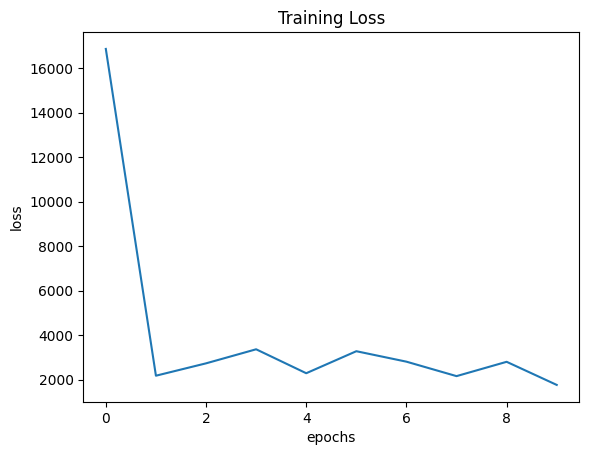

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


X, y = make_regression(n_samples=10000, n_features=5, n_targets=3, noise=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPRegressor([5, 10, 3], learning_rate=0.01, epochs=1000)
mlp.fit(X_train, y_train)

plt.plot(mlp.loss)
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [28]:
# generate predictions
y_pred = mlp.predict(X_test)

print(f"MSE: {np.mean((y_pred - y_test) ** 2)}\nMAE: {np.mean(np.abs(y_pred - y_test))}")

MSE: 2757.990232231531
MAE: 41.07351076890006
